# Определение перспективного тарифа для телеком-компании

Федеральный оператор сотовой связи «Мегалайн» предлагает клиентам два тарифных плана: **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font>**. Для корректировки рекламного бюджета необходимо определить тариф, который приносит больше денег.

Описание тарифов:

Тариф **<font color=“blue”>«Смарт»</font>**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

Тариф **<font color=“green”>«Ультра»</font>**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

**Цель исследования** — <u>определить более выгодный тариф для оператора и проверить 2 гипотезы:</u> <a id='hypothesis'></a>

1. средняя выручка пользователей тарифов **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font>** различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

В вашем распоряжении данные 500 пользователей «Мегалайна», а именно 5 таблиц:
- `users` (информация о пользователях)
- `calls` (информация о звонках)
- `messages` (информация о сообщениях)
- `internet` (информация об интернет-сессиях)
- `tariffs` (информация о тарифах)

О качестве данных ничего не известно. Поэтому перед началом исследования понадобится обзор и предобработка данных, в случае, если в них будут обнаружены артефакты. Начнем с проверки данных на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки постараемся исправить самые критичные из них, также создадим необходимые для дальнейшего анализа сводные таблицы со следующей информацией: 
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.
Остальная часть исследования будет посвящена самому анализу и подведению итогов.
 
**Таким образом, исследование пройдёт в 4 этапа:**
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Общий вывод.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1 (ОК)

Есть название проекта, описание задач и последовательность шагов 👍
</div>

## Обзор данных

Для начала импортируем библиотеки, которые понадобятся в нашей работе:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


from IPython.display import display

Загрузим 5 датафреймов:

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col='Unnamed: 0')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Поочередно составим первое представление о каждом из них. Чтобы избежать однотипных действий на каждом шаге создадим функцию `df_review`, которая выведет основную информацию о датафрейме:

In [3]:
def df_review(df):
    display(df.head())
    display(df.info())
    display(df.describe())
    print('Количество дубликатов:', df.duplicated().sum())

### Таблица users (информация о пользователях)

In [4]:
df_review(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Количество дубликатов: 0


**Столбцы:**
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом 
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

Проверим столбцы `first_name` и `last_name` на наличие неявных дубликатов (например, когда встречается одно и то же имя с заглавной и со строчной буквы):

In [5]:
for column in ['first_name', 'last_name']:
    display(users[column].sort_values().unique())

array(['Авксентий', 'Агата', 'Агафья', 'Агнесса', 'Адам', 'Аким', 'Аксён',
       'Алан', 'Алевтина', 'Александр', 'Александра', 'Алексей', 'Алина',
       'Алиса', 'Алла', 'Альберта', 'Альбин', 'Альфред', 'Алёна',
       'Анатолий', 'Анвар', 'Ангелина', 'Андрей', 'Анжелика', 'Анита',
       'Антонина', 'Анфиса', 'Арина', 'Арнольд', 'Арсен', 'Арсений',
       'Артемий', 'Артём', 'Аурелия', 'Афанасий', 'Ахмет', 'Аюна',
       'Белла', 'Берта', 'Борис', 'Вадим', 'Валентина', 'Валерий',
       'Валерия', 'Варвара', 'Варлам', 'Василиса', 'Вениамин', 'Вера',
       'Вероника', 'Веселина', 'Виктор', 'Виктория', 'Виолетта',
       'Виталий', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Габриель', 'Габриэль', 'Гайдар', 'Галина', 'Гарри', 'Гектор',
       'Гелена', 'Геннадий', 'Геодар', 'Георгий', 'Георгина', 'Геральд',
       'Герасим', 'Глеб', 'Гордей', 'Григорий', 'Дайна', 'Дана', 'Даниил',
       'Даниэла', 'Дебора', 'Демьян', 'Денис', 'Джемма', 'Джозефина',
       'Джулия', '

array(['Ёлчина', 'Ёркин', 'Ёркина', 'Ёрохов', 'Ёрохова', 'Абаимов',
       'Абакумов', 'Абакшина', 'Абалакова', 'Абалдуева', 'Абалкин',
       'Абашкин', 'Абашкина', 'Абдулина', 'Абоимов', 'Абрамович',
       'Абрамцев', 'Абрамычева', 'Абрашина', 'Абрикосова', 'Авдеев',
       'Авдеенко', 'Авдонюшкин', 'Авдушева', 'Авдышев', 'Авдюков',
       'Авраамова', 'Авраменко', 'Авринский', 'Аврорин', 'Авроров',
       'Авросимова', 'Авросинова', 'Авсейкина', 'Авчинникова', 'Агаев',
       'Агаева', 'Агапеева', 'Агеева', 'Адаменко', 'Адамов', 'Азаров',
       'Азерников', 'Азимова', 'Акимов', 'Акимчин', 'Акимычева',
       'Акиндинов', 'Акинин', 'Акинфьев', 'Аксёнов', 'Акуленко',
       'Александрова', 'Александрович', 'Александрюк', 'Алексеева',
       'Алексеенко', 'Алексеичев', 'Аленникова', 'Алесин', 'Алехина',
       'Алешин', 'Алешина', 'Алешкова', 'Алиев', 'Алфеева', 'Алфимов',
       'Алфимова', 'Алымова', 'Алютин', 'Алюшина', 'Алёшко', 'Алёшкова',
       'Амелин', 'Амелишко', 'Амельченк

Неявных дубликатов нет.

Таблица хранит личные данные о пользователях, название тарифного плана, даты его подключения и отключения. Бросаются в глаза пропуски в столбце `churn_date`, однако, документация, предоставленная к данным, предупреждает нас о том, что отсутствие этих значений говорит о действии тарифа на момент выгрузки, поэтому устранять их не будем.

На первый взгляд ошибок в данных не обнаружено, за исключением типа данных в reg_date, который нужно заменить на datetime.

### Таблица calls (информация о звонках)

In [6]:
df_review(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Количество дубликатов: 0


**Столбцы:**
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Таблица содержит уникальные номера звонков, их продолжительность, информацию о дате их совершения и id пользователей. Настораживает минимальное значение продолжительности звонка, равное нулю, однако, документация, предоставленная к данным, предупреждает нас о том, что  нулями обозначены пропущенные звонки.

На первый взгляд ошибок в данных не обнаружено, за исключением типа данных в reg_date, который нужно заменить на datetime.

Также название столбца `duration` следует привести в соответствие с хорошим стилем.

### Таблица messages (информация о сообщениях)

In [7]:
df_review(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Количество дубликатов: 0


**Столбцы:**
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Таблица содержит уникальные номера сообщений, даты их отправки и id пользователей. 

На первый взгляд ошибок в данных не обнаружено, за исключением типа данных в reg_date, который нужно заменить на datetime.

### Таблица internet (информация об интернет-сессиях)

In [8]:
df_review(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Количество дубликатов: 0


**Столбцы:**
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Таблица содержит уникальные номера сессий, даты, количество потраченных за сессии мегабайт и id пользователей. Смущает минимальное значение интернет-трафика за сессию - 0 МБ, что противоречит тому факту, что сессия зафиксирована, а значит состоялась.

На первый взгляд ошибок в данных не обнаружено, за исключением типа данных в reg_date, который нужно заменить на datetime.

### Таблица tariffs (информация о тарифах)

In [9]:
df_review(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Количество дубликатов: 0


**Столбцы:**
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

В датафреймах содержится информация о двух тарифах, их использовании пятьюстами абонентами за 2018 год и самих пользователях.

**Мы выявили 2 основные ошибки в данных:**
1. неверный тип данных в `churn_date`, `reg_date`, `call_date`, `session_date`, `message_date`;
2. нулевой объем интернет-трафика за сессию в `mb_used`.

Предварительно можно утверждать, что данных достаточно для проведения исследования, однако, необходимо будет учесть предоставленную к данным документацию и произвести следующие действия:
- `duration` привести к целым числам и округлить время до минут в большую сторону;
- `mb_used` привести к целым числам и округлить мегабайты до гигабайт.

## Предобработка данных

### Стиль заголовка `duration` 

Из названия столбца `duration` непонятно, в чем измеряется продолжительность, исправим заголовок:

In [10]:
calls = calls.rename(columns={'duration': 'duration_in_minutes'})
calls.columns

Index(['id', 'call_date', 'duration_in_minutes', 'user_id'], dtype='object')

### Обработка столбцов с датами

Приведем столбцы `churn_date`, `reg_date`, `call_date`, `session_date` и `message_date` к формату datetime, добавим дополнительные столбцы с названием и номером месяца.

In [11]:
# создадим словарь, чтобы заменить номер месяца на его название

dict_of_months = {
    1: 'Январь', 2: 'Февраль', 3: 'Март', 
    4: 'Апрель', 5: 'Май', 6: 'Июнь', 
    7: 'Июль', 8:'Август', 9:'Сентябрь', 
    10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'
}

# создадим функцию для приведения к типу datetime и добавления столбца с названием месяца
def date_handling(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column:
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month_number'] = df[column].dt.month
                df['month'] = df['month_number'].map(dict_of_months)

# применим функцию к датафреймам              
date_handling([users, calls, messages, internet])

# убедимся, что тип данных изменился и появился новый столбец месяца на примере одного df
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   202607 non-null  object        
 1   call_date            202607 non-null  datetime64[ns]
 2   duration_in_minutes  202607 non-null  float64       
 3   user_id              202607 non-null  int64         
 4   month_number         202607 non-null  int64         
 5   month                202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB


### Обработка аномальных значений в `mb_used`

Разберемся с зафиксированными сессиями интернет-трафика с нулевым количетсвом МБ.

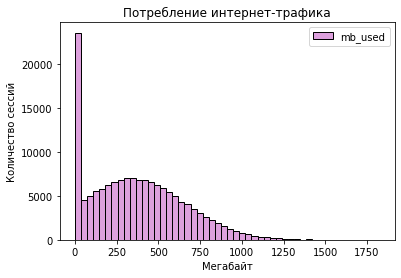

Аномальные значения составляют 13.1% от всей выборки


In [12]:
# создадим функцию для построения гистограмм:
def hist(df,column,color,x_name,y_name,title):

    # определим первый и третий квантиль и размах
    q1 = df[[column]].quantile(.25)[column]
    q3 = df[[column]].quantile(.75)[column]

    # зададим интерквартильный интервал
    iqr = q3 - q1
    
    # зададим параметры с диапазоном от минимального значения до Q3+3*IQR
    df.plot(y = column, kind = 'hist', bins = 50, color = color, 
                  edgecolor = 'black',range = (df[column].min(), q3+3*iqr))
    
    # подпишем оси:
    plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    
    # выведем гистограмму
    plt.show()
    
# выведем гистограмму интернет-трафика
hist(internet, 'mb_used', 'plum', 'Мегабайт', 'Количество сессий','Потребление интернет-трафика')

# выведем долю нулевых сессий от всех значений
print('Аномальные значения составляют {:.1%}'. format(len(internet.query('mb_used == 0')) / len(internet)) + ' от всей выборки')


Предположим, что нулевые сессии возникают в тех случаях, когда трафик, потребленный за сессию, меньше 1 МБ, или, когда пользователь не использовал интернет в течение месяца. Взглянем детальнее на нулевые сессии:

In [13]:
# узнаем, есть ли в df сессии с трафиком меньше 1 МБ
print('Количество сессий с трафиком меньше мегабайта:', len(internet.query('mb_used < 1')))

# посмотрим на данные с нулевыми сессиями
internet.query('mb_used == 0').head()

Количество сессий с трафиком меньше мегабайта: 19699


,id,mb_used,session_date,user_id,month_number,month
11,1000_11,0.0,2018-08-28,1000,8,Август
38,1000_38,0.0,2018-11-27,1000,11,Ноябрь
46,1000_46,0.0,2018-06-30,1000,6,Июнь
67,1000_67,0.0,2018-06-16,1000,6,Июнь
72,1000_72,0.0,2018-06-15,1000,6,Июнь


Text(0, 0.5, 'Месяц')

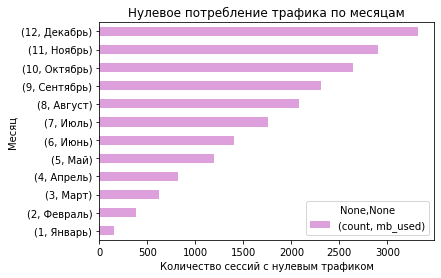

In [14]:
# создадим сводную таблицу медианных значений
pivot_table_month = internet.query('mb_used == 0').pivot_table(index = ['month_number', 'month'], 
                                                               values = 'mb_used', aggfunc = ['count'])

pivot_table_month.sort_values(by='month_number', inplace=True)

# построим график, отражающий количетсво нулевых сессий за месяц
pivot_table_month.plot(kind='barh', fontsize=10, color='plum')


plt.title('Нулевое потребление трафика по месяцам')
plt.xlabel('Количество сессий с нулевым трафиком')
plt.ylabel('Месяц')

Наша теория не оправдалась: 
- в таблице есть сессии с трафиком меньше 1 МБ (19699 строк);
- за один и тот же месяц у одного и того же пользователя встречается несколько нулевых сессий.
<a id="tendency"></a>
На графике *Нулевое потребление трафика по месяцам* видна интересная закономерность: в течение года количество запечетленных нулевых сессий планомерно растет. Для того, чтобы разобраться, с чем может быть связана данная аномалия - необходимо обратиться к коллегам, которые отвечают за сбор данных.

Сторки сессий с нулевым трафиком, хоть и составляют 13% от всех данных, не несут в себе полезной информации, поэтому удалим их:

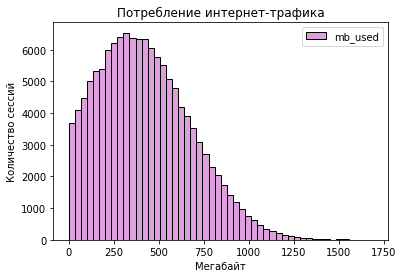

In [15]:
# заменим нулевые значения на NaN'ы и удалим их
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

# построим новую гистограмму интернет-трафика
hist(internet, 'mb_used', 'plum', 'Мегабайт', 'Количество сессий','Потребление интернет-трафика')

### Округление времени в `duration_in_minutes` 

In [16]:
calls.head()

,id,call_date,duration_in_minutes,user_id,month_number,month
0,1000_0,2018-07-25,0.00,1000,7,Июль
1,1000_1,2018-08-17,0.00,1000,8,Август
2,1000_2,2018-06-11,2.85,1000,6,Июнь
3,1000_3,2018-09-21,13.80,1000,9,Сентябрь
4,1000_4,2018-12-15,5.18,1000,12,Декабрь


In [17]:
# округлим значения к большему целому числу и заменим тип данных на int
calls['duration_in_minutes'] = np.ceil(calls['duration_in_minutes']).astype('int')

calls.head()

,id,call_date,duration_in_minutes,user_id,month_number,month
0,1000_0,2018-07-25,0,1000,7,Июль
1,1000_1,2018-08-17,0,1000,8,Август
2,1000_2,2018-06-11,3,1000,6,Июнь
3,1000_3,2018-09-21,14,1000,9,Сентябрь
4,1000_4,2018-12-15,6,1000,12,Декабрь


### Дополнительные рассчеты

Прежде, чем перейти к рассчету помесячной выручки с каждого пользователя, рассмотрим общие данные по услугам связи (звонки, СМС и интернет). 

#### Общее потребление услуг связи по месяцам

Сравним общее потребление услуг (звонки, СМС, интернет) по месяцам и между собой. Для этого задим функцию `plot_by_month`, которая построит отразит потребление услуг на одном графике по заданному параметру, или без него:

In [18]:
def plot_by_month(dataframes_list, query=None):
    
    # создадим список цветов для обозначения типа услуг
    list_of_colors = ['cadetblue', 'lightgrey', 'mediumspringgreen']

    # создадим список потребленных услуг
    type_of_services = ['Количество звонков','Количество СМС', 'Количество интернет-сессий']

    # создадим пустой список для создания легенды графика
    legend_list = []

    # строим графики в одной оси координат по заданным параметрам
    plt.figure(figsize=(15,5))
    ax = plt.gca()

    for i in range(len(dataframes_list)):
        df = dataframes_list[i]
        if query == None:
            grouped_df = df.groupby('month_number')['user_id'].count().reset_index()
        else:
            grouped_df = df.query(query).groupby('month_number')['user_id'].count().reset_index()

        plot = grouped_df.plot(
            x='month_number', y='user_id', 
            kind='bar', edgecolor='black', 
            color=list_of_colors[i],
            ax=ax, width=0.12, position=i
    )
     
        legend_list.append(type_of_services[i])
        
    plt.xticks(rotation=0)    

    ax.legend(legend_list)
    plt.title('Услуги оператора по месяцам для выборки')
    plt.xlabel('Номер месяца')
    plt.ylabel('Количество')

    plt.minorticks_on()
    plt.grid(linestyle='-', linewidth='0.5', color='darkseagreen')

    plt.show()    

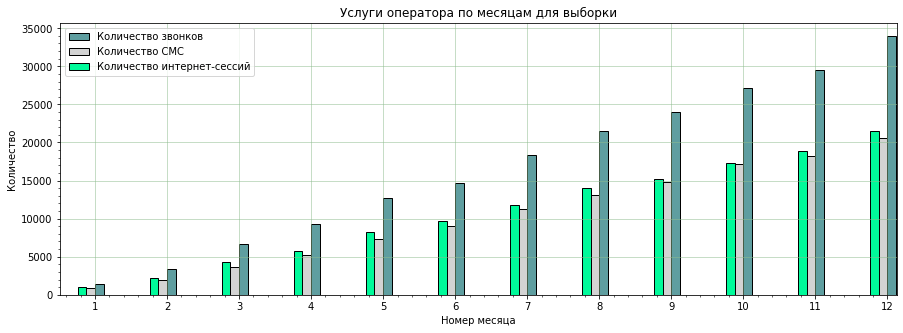

In [19]:
plot_by_month([calls, messages, internet])

По графику видно, что в каждом месяце рейтинг услуг сохраняется: самая популярная - это звонки, далее идет интернет и реже всего пользователи общаются по СМС.

Снова прослеживается [тенденция](#tendency), которую мы увидели, обрабатывая нулевой интернет-трафик: потребление всех услуг планомерно возрастает в течение года. Кажется, что это связано с тем, что тарифами начинают пользоваться все больше людей. Построим тот же график для одного из пользователей, например первого:

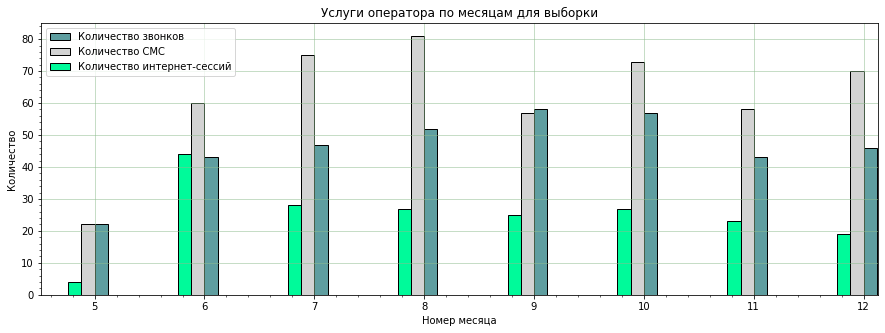

In [20]:
plot_by_month([calls, messages, internet], query='user_id == 1000')

И также посмотрим на количество пользователей, потребляющих какую-либо услугу, например, звоонки, по месяцам:

Text(0, 0.5, 'Количество')

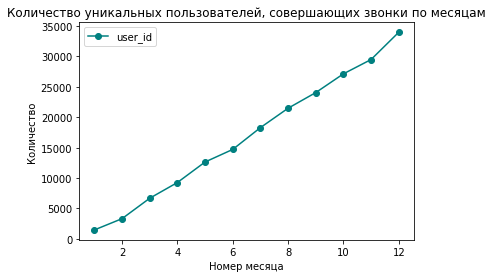

In [21]:
pivot_calls = calls.pivot_table(index = ['month_number'], 
                                values = 'user_id', aggfunc = ['count'])

pivot_calls.plot(y = 'count',style='o-',color='teal')

plt.title('Количество уникальных пользователей, совершающих звонки по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество')

Теория подтвердилась: для одного пользователя данные вариативны, а связь количества пользователей, потребляющих услуги, и времени - линейная. Такой прирост пользователь наводид на мысль, что данные были собраны в начале запуска тарифов. Важно отметить, что id пользователей никак не связаны с датой их присоединения к одному из тарифов, так как мы видим, что первый пользователь в наших данных с id 1000 приобрел тариф в мае.

#### Потребление услуг связи по месяцам для каждого пользователя

Посчитаем сколько каждый пользователь по месяцам:
- раз поговорил по телефону (исключим пропущенные звонки);
- потратил минут; 
- отправил смс;
- потратил МБ.

Соберем эти данные в отдельные таблицы:

In [22]:
calls_per_user = calls.query('duration_in_minutes != 0').groupby(['user_id', 'month_number'])['duration_in_minutes'].agg(['count','sum']).reset_index()
calls_per_user.columns = ['user_id', 'month_number', 'number_of_calls', 'minutes']

sms_per_user = messages.groupby(['user_id', 'month_number'])['id'].count().reset_index()
sms_per_user.columns = ['user_id', 'month_number', 'number_of_sms']

internet_per_user = internet.groupby(['user_id', 'month_number'])['mb_used'].sum().reset_index()
internet_per_user.columns = ['user_id', 'month_number', 'mb']

display(calls_per_user.head())
display(sms_per_user.head())
internet_per_user.head()

,user_id,month_number,number_of_calls,minutes
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


,user_id,month_number,number_of_sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


,user_id,month_number,mb
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Соберем всю помесячную информацию по абонентам в одну таблицу `abonents_info` методом mege() по типу outer, с помощью которого, мы не утратим данные, но получим NaN'ы.

In [23]:
abonents_info = pd.merge(calls_per_user, sms_per_user, how='outer', on=['user_id', 'month_number']) 
abonents_info = pd.merge(abonents_info, internet_per_user, how='outer', on=['user_id', 'month_number']) 
abonents_info = pd.merge(abonents_info, users.loc[:,['user_id', 'city', 'tariff']], how='outer', on=['user_id'])
abonents_info

,user_id,month_number,number_of_calls,minutes,number_of_sms,mb,city,tariff
0,1000,5.0,17.0,159.0,22.0,2253.49,Краснодар,ultra
1,1000,6.0,28.0,172.0,60.0,23233.77,Краснодар,ultra
2,1000,7.0,41.0,340.0,75.0,14003.64,Краснодар,ultra
3,1000,8.0,42.0,408.0,81.0,14055.93,Краснодар,ultra
4,1000,9.0,46.0,466.0,57.0,14568.91,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19559.44,Санкт-Петербург,smart
3212,1489,11.0,NaN,NaN,20.0,17491.56,Санкт-Петербург,smart
3213,1489,12.0,NaN,NaN,35.0,17322.51,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


Вернем тип int в столбцах `month_number`, `number_of_calls`, `minutes`, `number_of_sms` и `mb`:

In [24]:
abonents_info = abonents_info.astype({'month_number': 'Int64', 'number_of_calls': 'Int64',
                                      'minutes': 'Int64', 'number_of_sms': 'Int64'})
abonents_info

,user_id,month_number,number_of_calls,minutes,number_of_sms,mb,city,tariff
0,1000,5,17,159,22,2253.49,Краснодар,ultra
1,1000,6,28,172,60,23233.77,Краснодар,ultra
2,1000,7,41,340,75,14003.64,Краснодар,ultra
3,1000,8,42,408,81,14055.93,Краснодар,ultra
4,1000,9,46,466,57,14568.91,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10,<NA>,<NA>,21,19559.44,Санкт-Петербург,smart
3212,1489,11,<NA>,<NA>,20,17491.56,Санкт-Петербург,smart
3213,1489,12,<NA>,<NA>,35,17322.51,Санкт-Петербург,smart
3214,1128,<NA>,<NA>,<NA>,<NA>,NaN,Волжский,ultra


In [25]:
abonents_info.dtypes

user_id              int64
month_number         Int64
number_of_calls      Int64
minutes              Int64
number_of_sms        Int64
mb                 float64
city                object
tariff              object
dtype: object

Теперь попробуем убедиться, что при объединении таблиц с данными не возникли ошибки. Напищем функцию `test_series`, которая выведет информацию по конкретному пользователю (`user_id`) из `abonents` и 4х склеинных таблиц:

In [26]:
def test_series(user_id):
    print('Итоговая таблица:')
    display(abonents_info.query('user_id == @user_id'))
    print()
    print("4 таблицы до объединения: ")
    display(calls_per_user.query('user_id == @user_id'))
    display(sms_per_user.query('user_id == @user_id'))
    display(internet_per_user.query('user_id == @user_id'))
    display(users.query('user_id == @user_id'))
    
    print('Количество уникальных пользовательских id:', abonents_info['user_id'].nunique())

test_series(1222)              

Итоговая таблица:


,user_id,month_number,number_of_calls,minutes,number_of_sms,mb,city,tariff
1398,1222,8,6,28,4,2289.70,Уфа,ultra
1399,1222,9,148,1261,109,19423.76,Уфа,ultra
1400,1222,10,157,1322,133,26927.85,Уфа,ultra
1401,1222,11,121,1027,114,21535.15,Уфа,ultra
1402,1222,12,146,1261,135,24756.38,Уфа,ultra



4 таблицы до объединения: 


,user_id,month_number,number_of_calls,minutes
1398,1222,8,6,28
1399,1222,9,148,1261
1400,1222,10,157,1322
1401,1222,11,121,1027
1402,1222,12,146,1261


,user_id,month_number,number_of_sms
1163,1222,8,4
1164,1222,9,109
1165,1222,10,133
1166,1222,11,114
1167,1222,12,135


,user_id,month_number,mb
1414,1222,8,2289.70
1415,1222,9,19423.76
1416,1222,10,26927.85
1417,1222,11,21535.15
1418,1222,12,24756.38


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_number,month
222,1222,44,NaT,Уфа,Пётр,Булгаков,2018-08-30,ultra,8,Август


Количество уникальных пользовательских id: 500


Все хорошо, проблемы не выявлены. Осталось разобраться с появившимися пропусками, посомтрим, сколько их:

In [27]:
abonents_info.isna().sum()

user_id              0
month_number         2
number_of_calls     48
minutes             48
number_of_sms      499
mb                  15
city                 0
tariff               0
dtype: int64

Природа пропусков в столбцах `number_of_calls`, `minutes`, `number_of_sms` и `mb` ясна: не все и не всегда используют все три вида связи. Однако зафиксированные NaN'ы в `month_number` говорят о том, что 2 пользователя ни разу не использовали ни один вид связи, узнаем их id:

In [28]:
abonents_info.query('month_number.isna()')

,user_id,month_number,number_of_calls,minutes,number_of_sms,mb,city,tariff
3214,1128,<NA>,<NA>,<NA>,<NA>,NaN,Волжский,ultra
3215,1371,<NA>,<NA>,<NA>,<NA>,NaN,Омск,smart


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       500 non-null    int64         
 1   age           500 non-null    int64         
 2   churn_date    38 non-null     datetime64[ns]
 3   city          500 non-null    object        
 4   first_name    500 non-null    object        
 5   last_name     500 non-null    object        
 6   reg_date      500 non-null    datetime64[ns]
 7   tariff        500 non-null    object        
 8   month_number  500 non-null    int64         
 9   month         500 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 39.2+ KB


Посмотрим на основную информацию о них из таблицы `users`:

In [30]:
users.query('user_id == 1128 | user_id == 1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_number,month
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,Декабрь
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,Декабрь


Ксения и Ириней приобрели тарифы в конце года, 15 и 25 декабря соответственно, и еще не успели воспользоваться ими по каким-то причинам. Данные о них в анализе не понадобятся, поэтому удалим этих пользователей из `abonents_info`:

In [31]:
abonents_info = abonents_info.query('month_number != 0').reset_index(drop=True)

# проверим, что их не осталось в df
len(abonents_info.query('month_number == 0'))

0

В остальных кейсах пропуски в логично заполнить нулями.

In [32]:
abonents_info = abonents_info.fillna(0)
abonents_info.isna().sum()

user_id            0
month_number       0
number_of_calls    0
minutes            0
number_of_sms      0
mb                 0
city               0
tariff             0
dtype: int64

#### Помесячная выручка с каждого пользователя

Теперь можно приступить к рассчетам помесячной выручки с каждого пользователя, рассчитаем следующим образом: вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану. Полученные значения поместим в столбец `income_rub`.

Перед расчетами взгляним на условия тарифов:

In [33]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Перед началом вычислений выручки напишем функцию `to_gb`, которая будет округлять количество потребленных МБ в месяц в бóльшую сторону до ГБ, согласно тому как округляет потребление интернет-трафик "Мегалайн" (например, если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта) и проверим ее работу на нашем примере:

In [34]:
def to_gb(mb):
    if mb % 1024 == 0:
        return mb // 1024
    else:
        return mb // 1024 + 1

print('1025 МБ, потраченных в месяц, оператор округлит до', to_gb(1025), 'ГБ')
print('1024 МБ, потраченных в месяц, оператор округлит до',to_gb(1024), 'ГБ')
print('5121 МБ, потраченных в месяц, оператор округлит до',to_gb(5121), 'ГБ')

1025 МБ, потраченных в месяц, оператор округлит до 2 ГБ
1024 МБ, потраченных в месяц, оператор округлит до 1 ГБ
5121 МБ, потраченных в месяц, оператор округлит до 6 ГБ


Теперь создадим функцию `income_by_month`, которая посчитает выручку согласно условиям каждого из тарифов:

In [35]:
def income_by_month(abonents_info):
    
    # считаем выручку для тарифа "Смарт"
    if abonents_info['tariff'] == 'smart':
        
        inc_calls = (abonents_info['minutes'] - tariffs.loc[0,'minutes_included']) * tariffs.loc[0,'rub_per_minute']
        if inc_calls < 0 :
            inc_calls = 0
        
        inc_sms = (abonents_info['number_of_sms'] - tariffs.loc[0,'messages_included']) * tariffs.loc[0,'rub_per_message']
        if inc_sms < 0 :
            inc_sms = 0
        
        # функция to_gb(mb) описана в пункте 2.5
        inc_mb  = to_gb((abonents_info['mb'] - tariffs.loc[0,'mb_per_month_included'])) * tariffs.loc[0,'rub_per_gb'] 
        if inc_mb < 0 :
            inc_mb = 0
             
        inc = inc_calls + inc_sms + inc_mb + tariffs.loc[0,'rub_monthly_fee']
    
    # считаем выручку для тарифа "Ультра"
    else:
        
        inc_calls = (abonents_info['minutes'] - tariffs.loc[1,'minutes_included']) * tariffs.loc[1,'rub_per_minute']
        if inc_calls < 0 :
            inc_calls = 0
        
        inc_sms = (abonents_info['number_of_sms'] - tariffs.loc[1,'messages_included']) * tariffs.loc[1,'rub_per_message']
        if inc_sms < 0 :
            inc_sms = 0
            
        # округлим МБ до ГБ с помощью функции to_gb(mb) 
        inc_mb  = to_gb((abonents_info['mb'] - tariffs.loc[1,'mb_per_month_included'])) * tariffs.loc[1,'rub_per_gb'] 
        if inc_mb < 0 :
            inc_mb = 0
             
        inc = inc_calls + inc_sms + inc_mb + tariffs.loc[1,'rub_monthly_fee']
        
    
    return inc

# создаем столбец для выручки и кладем в него ее значения:
abonents_info['income_rub'] = (abonents_info.apply(income_by_month, axis=1)).astype('int')

# убедимся, что появился новый столбец с помесячной выручкой на 5 рандомных series:
abonents_info.sample(5)

,user_id,month_number,number_of_calls,minutes,number_of_sms,mb,city,tariff,income_rub
2308,1372,3,57,473,32,13232.94,Магнитогорск,smart,550
2943,1464,4,76,694,18,17425.01,Саранск,smart,1732
2752,1431,7,33,299,77,21506.95,Уфа,smart,2031
1108,1176,6,44,399,40,24574.70,Волгоград,smart,2350
1939,1310,4,55,501,54,23681.91,Уфа,ultra,1950


#### Превышение тарифного плана по тарифам

Финальным штрихом в нашей таблице с помесячной информацией о пользователях тарифов - `abonents_info` будут два столбца:
1. `keep_to_tariff_plan` с булевыми значениями (True - если тарифный план превышен и False, если абонент уложился);
2. `overpayment_rub` - cумма переплаты сверх тарифного плана в рублях.

Заполним столбцы с помощью двух вункций соответсвенно: `keep_to(abonents_info)`, которая возращает булевое значение, есть ли задолженность у абонента, и `overpayment(abonents_info)`, которая возращает сумму переплаты:

In [36]:
def keep_to(abonents_info):

    if abonents_info['tariff'] == 'smart':
        
        if abonents_info['income_rub'] > 550:
            keep_to_tariff_plan = False
        else:
            keep_to_tariff_plan = True
                  
    else:
        
        if abonents_info['income_rub'] > 1950:
            keep_to_tariff_plan = False
        else:
            keep_to_tariff_plan = True
      
    return keep_to_tariff_plan


def overpayment(abonents_info):

    if abonents_info['tariff'] == 'smart':

        if abonents_info['income_rub'] > 550:
            payment = abonents_info['income_rub'] - 550
        else:
            payment = 0 

    else:

        if abonents_info['income_rub'] > 1950:
            payment = abonents_info['income_rub'] - 1950
        else:
            payment = 0      

    return payment

abonents_info['keep_to_tariff_plan'] = abonents_info.apply(keep_to, axis=1)
abonents_info['overpayment_rub'] = abonents_info.apply(overpayment, axis=1)

# убедимся, что столбцы появились на 5 рандомных строчках:
display(abonents_info.sample(5))

,user_id,month_number,number_of_calls,minutes,number_of_sms,mb,city,tariff,income_rub,keep_to_tariff_plan,overpayment_rub
1812,1290,11,51,441,0,19423.11,Нижний Новгород,smart,1350,False,800
308,1049,11,74,666,0,12458.33,Москва,ultra,1950,True,0
1887,1301,10,70,595,0,19640.11,Махачкала,smart,1835,False,1285
157,1023,12,67,557,49,28380.99,Томск,smart,3321,False,2771
181,1027,11,51,348,9,24707.70,Петрозаводск,smart,2550,False,2000


Посмотрим, абоненты какого тарифа чаще не укладываются в тарифный план с помощью круговых диаграмм:

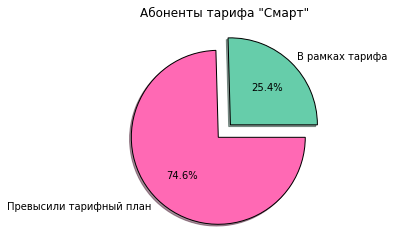

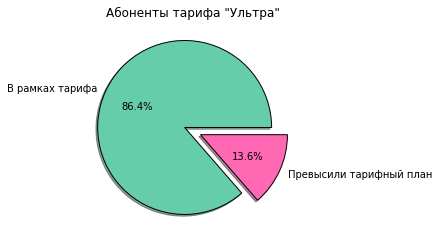

In [37]:
# задаим фильтр для добавления названий к диаграммам
filter_list_counter = 0

# с помощью цикла построим две круговые диаграммы для тарифов
for tariff in ['smart', 'ultra']:
    values = [len(abonents_info.query('keep_to_tariff_plan == True & tariff == @tariff')), 
                 len(abonents_info.query('keep_to_tariff_plan == False & tariff == @tariff'))]
    
    labels = ['В рамках тарифа', 'Превысили тарифный план']
    titles_list = ['Абоненты тарифа "Смарт"', 'Абоненты тарифа "Ультра"']
    

    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors = ['mediumaquamarine', 'hotpink'], 
           wedgeprops = {'lw':1, 'ls':'-','edgecolor':'black'},
           explode = [0.1, 0.1], shadow = True)
    
    
    plt.title(titles_list[filter_list_counter])
    plt.show()
    filter_list_counter += 1

Мы видим, что почти 75% пользователей тарифа **<font color=“blue”>«Смарт»</font>** из нашей выборки не укладываются в тарифный план и переплачивают за привышенные лимиты. Ровно противоположная ситуация обстоит с тарифом **<font color=“green”>«Ультра»</font>**: 86% абонентов этого тарифа укладываются в абонентскую плату. Результат не удивляет, учитывая разницу предлагаемых условий 2ух тарифных пакетов (у тарифа **<font color=“green”>«Ультра»</font>** условия пакета намного шире).

In [38]:
abonents_info.head(5)

,user_id,month_number,number_of_calls,minutes,number_of_sms,mb,city,tariff,income_rub,keep_to_tariff_plan,overpayment_rub
0,1000,5,17,159,22,2253.49,Краснодар,ultra,1950,True,0
1,1000,6,28,172,60,23233.77,Краснодар,ultra,1950,True,0
2,1000,7,41,340,75,14003.64,Краснодар,ultra,1950,True,0
3,1000,8,42,408,81,14055.93,Краснодар,ultra,1950,True,0
4,1000,9,46,466,57,14568.91,Краснодар,ultra,1950,True,0


Интересно посмотреть, по какому тарифу больше и чаще сами переплаты, нарисуем гистограмму с переплатами для тарифов на одной оси координат:

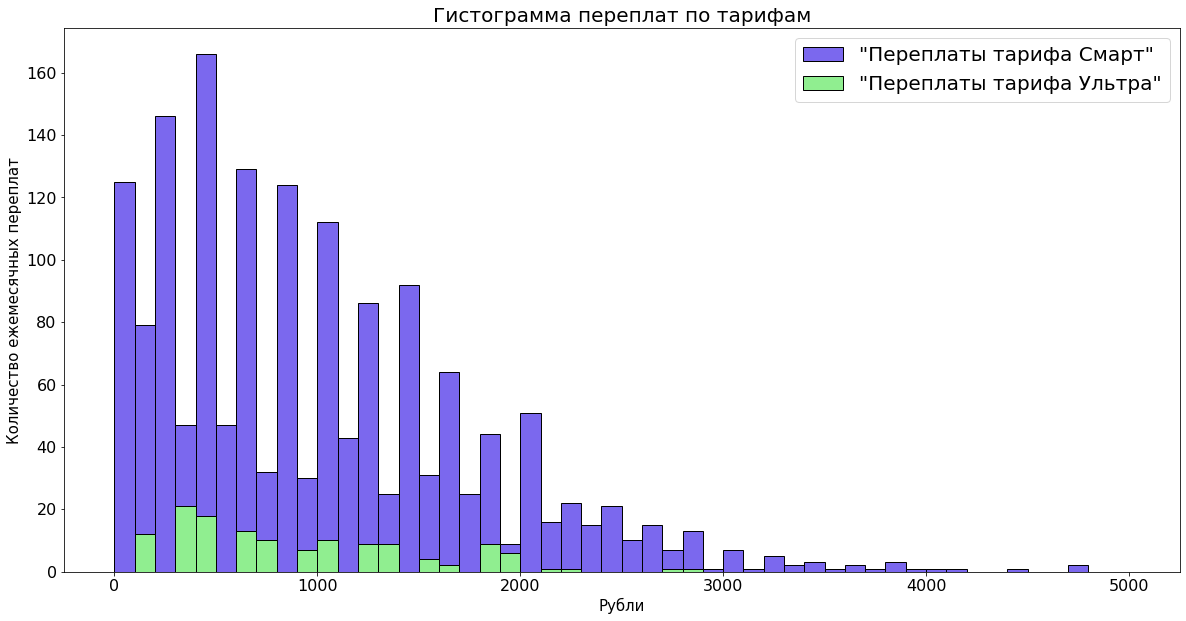

In [39]:
from matplotlib.pyplot import MultipleLocator

def overpayments_hist(df, max_lim):

    # строим гистограмму переплат абонентов тарифа "Смарт"
    ax = df.query('tariff == "smart" & keep_to_tariff_plan == False').plot(y = 'overpayment_rub', 
                                                                                      kind = 'hist', bins = 50, 
                                                                                      label='"Переплаты тарифа Смарт"', 
                                                                                      range = (0, max_lim), figsize=(20,10),
                                                                                      color = 'mediumslateblue',
                                                                                      ec='black')
    # строим гистограмму переплат абонентов тарифа "Ультра"
    df.query('tariff == "ultra" & keep_to_tariff_plan == False').plot(y = 'overpayment_rub', kind = 'hist', 
                                                                                 bins = 50, label='"Переплаты тарифа Ультра"', 
                                                                                 range = (0, max_lim),
                                                                                 color = 'lightgreen', ec='black',
                                                                                 ax=ax)

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title('Гистограмма переплат по тарифам', fontsize = 20)
    plt.xlabel('Рубли', fontsize = 15)
    plt.ylabel('Количество ежемесячных переплат', fontsize = 15)
    plt. legend(fontsize=20)

    plt.show()
    
overpayments_hist(abonents_info, 5000)

По графику можно предположить, что переплаты по тарифу **<font color=“blue”>«Смарт»</font>** не только чаще встречаются, но также сами суммы больше. Кажется, что тариф **<font color=“green”>«Ультра»</font>** менее прибыльный для оператора. Но по гистограмме видно, что выборки разные по размеру, поэтому это мнение может быть ошибочным. Ответим точно на этот вопрос в самом исследовании.

### Вывод

**На этапе предобработки данных мы:**
1. изменили стиль заголовка столбца `duration` на `duration_in_minutes` для того, чтобы стала понятна единица измерения;
2. привели столбцы `churn_date`, `reg_date`, `call_date`, `session_date` и `message_date` к формату datetime, а также добавили в таблицы дополнительные столбцы с названием и номером месяца для дальнейших рассчетов;
3. разобрались с аномальными значениями в `mb_used`, а именно: удалили series c зафиксированными нулевыми интернет-сессиями, природу возникновения которых необходимо выяснить вместе с коллегами, которые отвечают за сбор данных;
4. округлили время в `duration_in_minutes`, согласно правилам оператора, для дальнейших рассчетов;
5. создали функцию `to_gb(mb)`, которая округляет МБ до ГБ, согласно правилам оператора, для дальнейших рассчетов;
6. создали таблицу `abonents_info`, в которой хранится помесячная информация о пользователях тарифов: 
    - `user_id` - айди пользователя;
    - `month_number` - номер месяца проявления активности;
    - `number_of_calls` - кол-во звонков;
    - `minutes` - кол-во минут разговоров;
    - `number_of_sms` - кол-во смс;
    - `mb` - кол-во МБ;
    - `city` - город пользователя;
    - `tariff` - название тарифа;
    - `income_rub` - прибыль в рублях;
    - `keep_to_tariff_plan` - булевое значение, уложился ли абонент в тарифный план;
    - `overpayment_rub` - размер переплат.
    
**Также мы выяснили:**
- самым популярным видом свзи являются звонки, далее идет интернет и реже всего пользователи общаются по СМС;
- скорее всего данные были собраны в начале запуска тарифов;
- 75% пользователей тарифа **<font color=“blue”>«Смарт»</font>** из нашей выборки не укладываются в тарифный план и переплачивают за привышенные лимиты, в то время как противоположная ситуация обстоит с тарифом **<font color=“green”>«Ультра»</font>**: 86% абонентов этого тарифа укладываются в абонентскую плату.

**Предположили:**
- что тариф **<font color=“green”>«Ультра»</font>** менее прибыльный для оператора;
- суммы переплат у тарифа **<font color=“blue”>«Смарт»</font>** выше.

## Исследовательский анализ данных


### Распределение пользователей по тарифам

Сначала посмотрим на распределение пользователей по тарифам на круговой диаграмме:

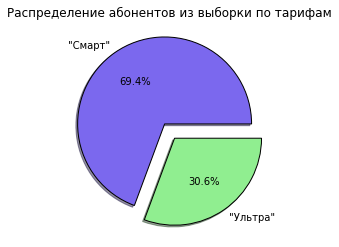

In [40]:
tariffs_pivot = abonents_info.pivot_table(index='tariff', values='user_id', aggfunc='count')

values = tariffs_pivot['user_id'].values.tolist()
labels = ['"Смарт"', '"Ультра"']

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', colors = ['mediumslateblue', 'lightgreen'], 
           wedgeprops = {'lw':1, 'ls':'-','edgecolor':'black'},
           explode = [0.1, 0.1], shadow = True)
plt.title('Распределение абонентов из выборки по тарифам')    
    
plt.show()

Учитывая, что количество абонентов тарифа **<font color=“blue”>«Смарт»</font>** более, чем в 2 раза превышает количество абонентов тарифа **<font color=“green”>«Ультра»</font>**, логично далее сравнивать выборки по средним значениям.

### Среднее потребление услуг связи и выручка по месяцам по тарифам

Создадим таблицу `tariffs_info` с средними показателями потребления услуг абаонентами по месяцам и месячной выручки по двум тарифам:

In [41]:
tariffs_info = abonents_info.groupby(['tariff', 'month_number'])[['minutes', 
                                                                   'number_of_sms', 
                                                                   'mb','income_rub',
                                                                  'overpayment_rub']].mean().reset_index()
tariffs_info

,tariff,month_number,minutes,number_of_sms,mb,income_rub,overpayment_rub
0,smart,1,203.852941,18.235294,8513.717647,721.323529,171.323529
1,smart,2,298.689655,24.086207,11597.054310,827.603448,277.603448
2,smart,3,390.051948,31.857143,15104.159091,1164.623377,614.623377
3,smart,4,367.133929,30.741071,13462.180625,963.089286,413.089286
4,smart,5,387.361702,33.77305,15805.184326,1197.510638,647.510638
5,smart,6,395.640244,33.402439,15794.647988,1204.018293,654.018293
6,smart,7,408.353234,33.751244,15743.150348,1223.950249,673.950249
7,smart,8,421.468085,33.638298,16610.720085,1320.595745,770.595745
8,smart,9,428.611538,33.638462,16303.578808,1249.946154,699.946154
9,smart,10,426.136054,33.765306,16757.122891,1364.853741,814.853741


Для удобства в дальнейших расчетах разобьем ее на две таблицы по тарифам - `smart` и `ultra`:

In [42]:
smart = tariffs_info.query('tariff=="smart"')
ultra = tariffs_info.query('tariff=="ultra"').reset_index(drop=True)
display(smart)
ultra

,tariff,month_number,minutes,number_of_sms,mb,income_rub,overpayment_rub
0,smart,1,203.852941,18.235294,8513.717647,721.323529,171.323529
1,smart,2,298.689655,24.086207,11597.054310,827.603448,277.603448
2,smart,3,390.051948,31.857143,15104.159091,1164.623377,614.623377
3,smart,4,367.133929,30.741071,13462.180625,963.089286,413.089286
4,smart,5,387.361702,33.77305,15805.184326,1197.510638,647.510638
5,smart,6,395.640244,33.402439,15794.647988,1204.018293,654.018293
6,smart,7,408.353234,33.751244,15743.150348,1223.950249,673.950249
7,smart,8,421.468085,33.638298,16610.720085,1320.595745,770.595745
8,smart,9,428.611538,33.638462,16303.578808,1249.946154,699.946154
9,smart,10,426.136054,33.765306,16757.122891,1364.853741,814.853741


,tariff,month_number,minutes,number_of_sms,mb,income_rub,overpayment_rub
0,ultra,1,428.111111,33.777778,13140.681111,1950.000000,0.000000
1,ultra,2,297.125,21.958333,11775.937500,1975.000000,25.000000
2,ultra,3,489.648649,32.297297,17535.550270,2014.864865,64.864865
3,ultra,4,458.018182,31.563636,16828.134364,2001.818182,51.818182
4,ultra,5,510.328358,37.850746,19363.152985,2059.701493,109.701493
5,ultra,6,479.702381,41.72619,18924.939286,2039.285714,89.285714
6,ultra,7,545.791209,49.846154,20495.665165,2118.131868,168.131868
7,ultra,8,510.775701,48.439252,19576.054673,2083.177570,133.177570
8,ultra,9,539.443478,52.286957,19204.277130,2024.347826,74.347826
9,ultra,10,558.081301,58.430894,20045.337317,2065.853659,115.853659


Посмотрим на поведение клиентов оператора: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется в среднем пользователю каждого тарифа в месяц, какую помесячную выручку приносит "средний" пользователь в месяц.
Выведем информацию о каждом тарифе и построим гистограммы по описанным выше показателям и проведем пороги по лимитам (того, что включено в абонентскую плату):

In [43]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


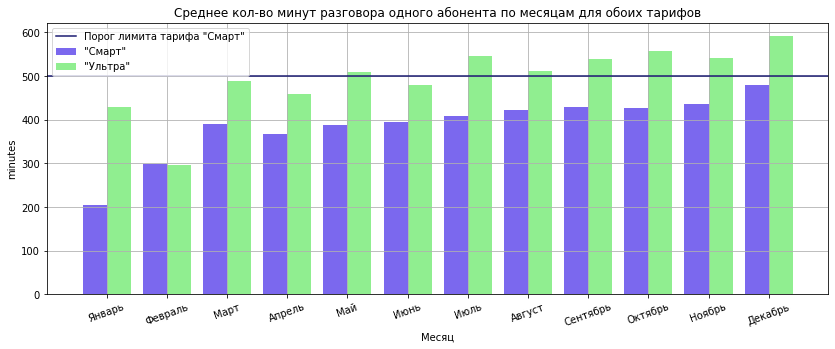

Среднее потребление в месяц для тарифа "Смарт": 387
Среднее потребление в месяц для тарифа "Ультра": 496


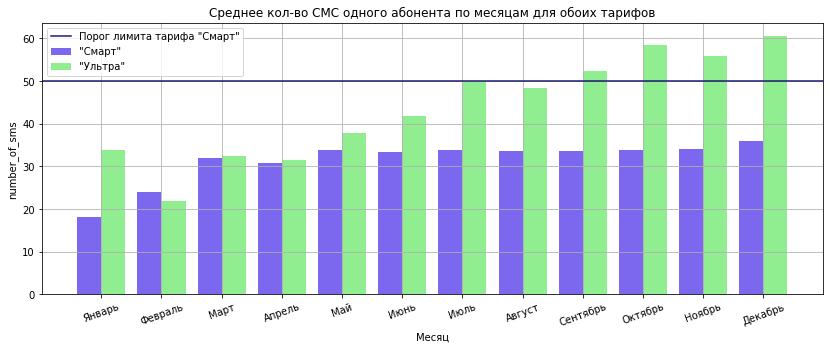

Среднее потребление в месяц для тарифа "Смарт": 31
Среднее потребление в месяц для тарифа "Ультра": 44


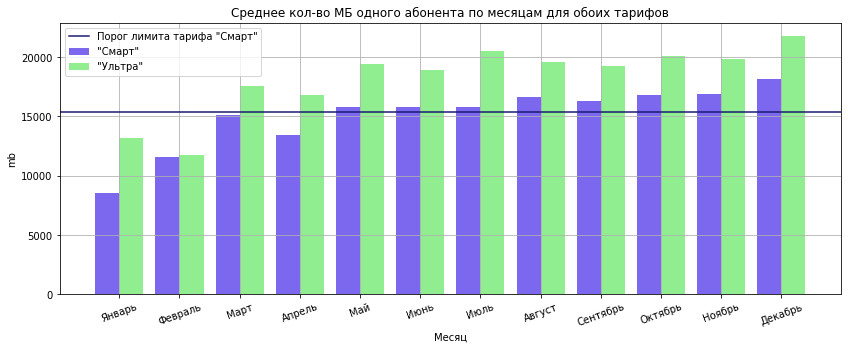

Среднее потребление в месяц для тарифа "Смарт": 15058
Среднее потребление в месяц для тарифа "Ультра": 18206


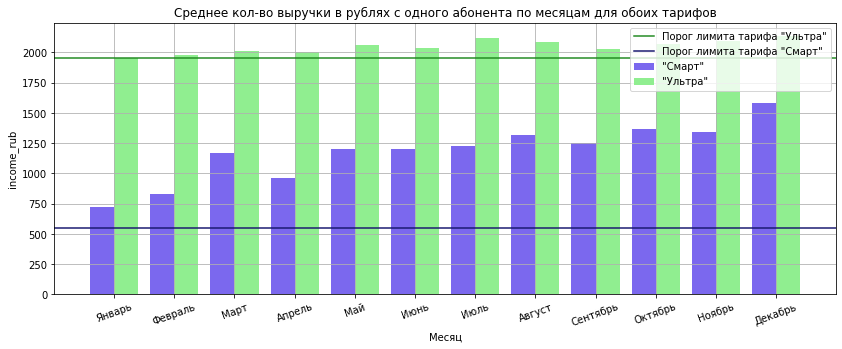

Средняя прибыль в месяц по тарифу "Смарт": 1180
Средняя прибыль в месяц по тарифу "Ультра:" 2047


In [44]:
for col in ['minutes', 'number_of_sms', 'mb','income_rub']:
    
    plt.figure(figsize=(14, 5))
    w = 0.4
    plt.bar(smart['month_number']-w/2, smart[col], label='"Смарт"', 
            color = 'mediumslateblue', width=w)
    plt.bar(ultra['month_number']+w/2, ultra[col], label='"Ультра"', 
            color = 'lightgreen', width=w)

# porog - лимит тарифа, все, что входит в абонентскую плату
    if col == 'minutes':
        parameter = 'минут разговора'
        porog=500
        #porog2=3000
    elif col == 'number_of_sms':
        parameter = 'СМС'
        porog=50
        #porog2=1000
    elif col == 'mb':
        parameter = 'МБ'
        porog=15360
        #porog2=30720
    else:
        parameter = 'выручки в рублях с'
        porog=550
        porog2=1950
        plt.axhline(y=porog2, label='Порог лимита тарифа "Ультра"', color = 'forestgreen')        
        
   
        
    plt.axhline(y=porog, label='Порог лимита тарифа "Смарт"', color = 'midnightblue')  
      
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                      ['Январь', 'Февраль','Март', 'Апрель', 
                       'Май', 'Июнь', 'Июль','Август', 'Сентябрь',
                       'Октябрь', 'Ноябрь', 'Декабрь'],
                    rotation=20)
    
    plt.xlabel('Месяц')
    plt.ylabel(col)
    plt.grid()
    plt.title(f'Среднее кол-во {parameter} одного абонента по месяцам для обоих тарифов')
    plt.legend()
    plt.show()
    
    if col in ['minutes', 'number_of_sms', 'mb']:
        print('Среднее потребление в месяц для тарифа "Смарт":', round(smart[col].mean()))
        print('Среднее потребление в месяц для тарифа "Ультра":', round(ultra[col].mean()))
    else:
        print('Средняя прибыль в месяц по тарифу "Смарт":', round(smart[col].mean()))
        print('Средняя прибыль в месяц по тарифу "Ультра:"', round(ultra[col].mean()))

**Тариф <font color=“blue”>«Смарт»</font>**

Мы видим, что по минутам звонков и количеству СМС абоненты, как правило, укладываются в лимит тарифа, включенного в ежемесячную абонентскую плату. Если говорить МБ, с мая по декабрь 2018 года, абоненты, в среднем, превышали порог лимита, в начале года укладывались в него. Тем не менее, на последнем графике по выручке мы видим, что в каждом месяце есть переплаты, в среднем до 1000 руб сверх абонентской платы. Кажется, что они в бóльшей степени связаны с МБ, потребленными сверх лимита, которые после превышения границы лимита превращаются в ГБ. Также на среднее значение по переплатам могли повлиять выбросы.

**Тариф <font color=“green”>«Ультра»</font>**

По всем трем видам связи абоненты тарифа, как правило, укладываются в лимит трафика. Однако на последней гистограмме мы видим незначительные переплаты (в среднем до 180 рублей сверх абонентской платы), предположим, что они появились по тем же причинам, что и у тарифа **<font color=“blue”>«Смарт»</font>**.

#### Основная причина переплат по тарифам

Посмотрим на гистограмму переплат по тарифам в бóльшем масштабе:

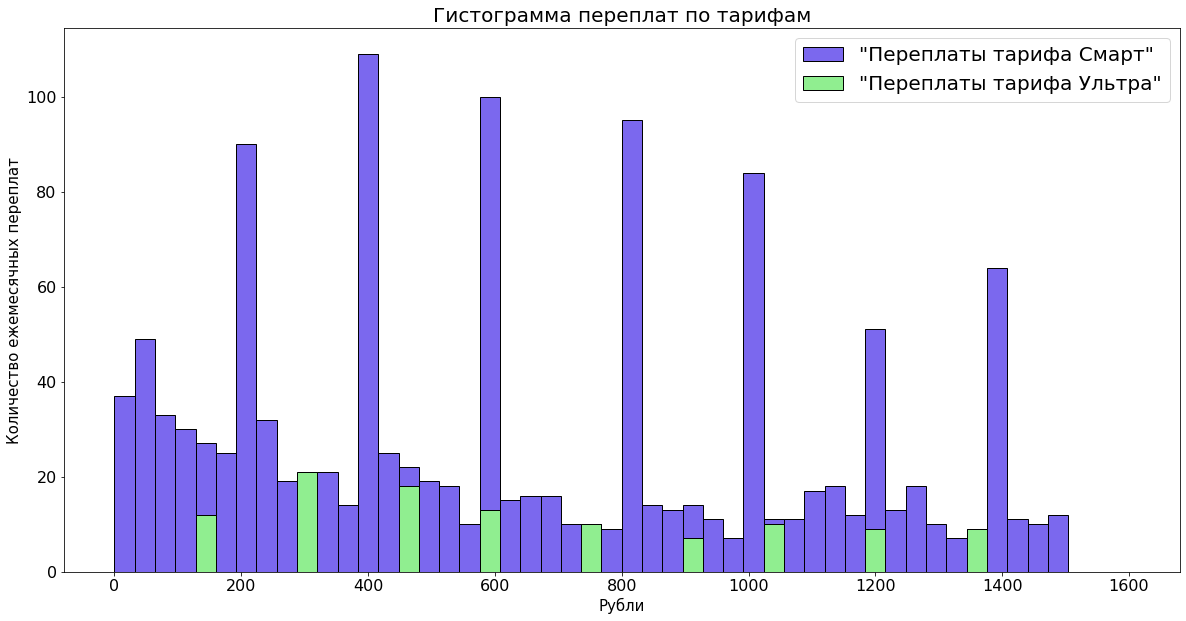

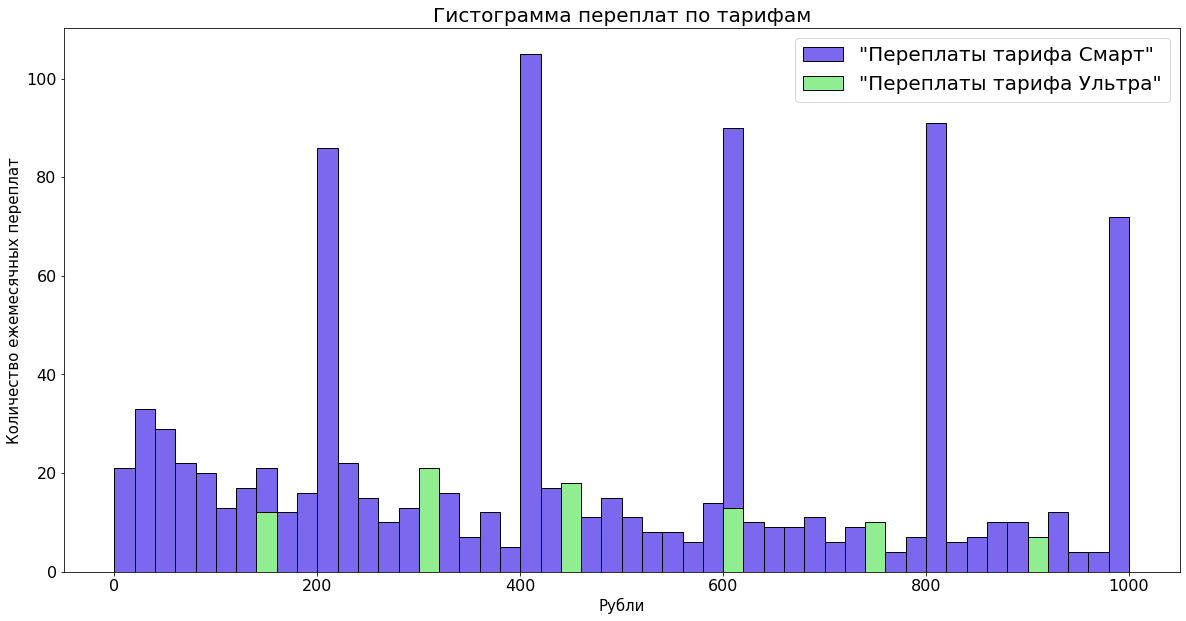

In [45]:
overpayments_hist(abonents_info.query('keep_to_tariff_plan == False & overpayment_rub <1500'), 1600)
overpayments_hist(abonents_info.query('keep_to_tariff_plan == False & overpayment_rub <1500'), 1000)

Наша теория с переплатами за интернет траффик подтвердилась: абоненты тарифа **<font color=“green”>«Ультра»</font>** переплачивают исключительно за дополнительный интернет-траффик, по остальным видам связи они полностью укладываются в лимит тарифного плана (суммы их переплат всегда кратны 150 руб., что равно цене 1 ГБ сверх тарифного плана).

Абоненты тарифа **<font color=“blue”>«Смарт»</font>** чаще всего так же переплачивают за дополнительные ГБ (большая часть переплат кратна 200 руб., что равно цене 1 ГБ сверх тарифного плана).

### Распределение услуг связи и выручки по тарифам

Создадим таблицу `stat_frame`, где будут отражены медиана, среднее количество, дисперсия, стандартное отклонение и его доля услуг связи и выручки для обоих тарифов

In [46]:
stat_frame = pd.DataFrame(columns = ['tariff', 'parameter', 'median', 'mean', 'var', 'std'])

ind = 0
t = ['smart', 'ultra']
for param in ['minutes', 'number_of_sms', 'mb', 'income_rub', 'overpayment_rub']:   
    tariff_ind = 0
    for df in [abonents_info.query('tariff == "smart"'), abonents_info.query('tariff == "ultra"')]:
        stat_frame.loc[ind, 'tariff'] = t[tariff_ind]
        stat_frame.loc[ind, 'parameter'] = param
        stat_frame.loc[ind, 'median'] = round(df[param].median(),1)
        stat_frame.loc[ind, 'mean'] = round(df[param].mean(),1)
        stat_frame.loc[ind, 'var'] = round(np.var(df[param], ddof=1),1) # Поскольку данные являются выборкой, это указано
        stat_frame.loc[ind, 'std'] = round(np.std(df[param], ddof=1),1) # в условии, то ипользуем параметр - ddof=1
        
        ind +=1
        tariff_ind +=1
stat_frame

,tariff,parameter,median,mean,var,std
0,smart,minutes,422.0,417.9,36219.3,190.3
1,ultra,minutes,518.0,526.6,100873.6,317.6
2,smart,number_of_sms,28.0,33.4,796.8,28.2
3,ultra,number_of_sms,38.0,49.4,2285.3,47.8
4,smart,mb,16506.8,16208.4,34462496.5,5870.5
5,ultra,mb,19308.0,19468.8,101751013.8,10087.2
6,smart,income_rub,1023.0,1290.0,669785.7,818.4
7,ultra,income_rub,1950.0,2070.2,141516.7,376.2
8,smart,overpayment_rub,473.0,740.0,669785.7,818.4
9,ultra,overpayment_rub,0.0,120.2,141516.7,376.2


#### Минуты разговоров

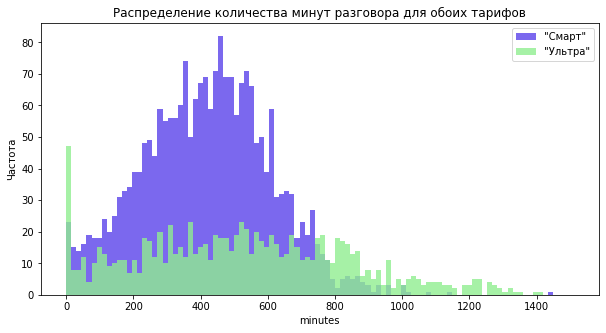

In [47]:
def distribution(column):
    
    if column == 'minutes':
        parameter = 'минут разговора'
    elif column == 'number_of_sms':
        parameter = 'СМС'
    else:
        parameter = 'МБ'
    
    # определим первый и третий квантиль и размах
    sq1 = abonents_info[[column]].quantile(.25)[column]
    sq3 = abonents_info[[column]].quantile(.75)[column]
    
    uq1 = abonents_info[[column]].quantile(.25)[column]
    uq3 = abonents_info[[column]].quantile(.75)[column]
    
    # зададим интерквартильный интервал
    sIQR = sq3 - sq1
    uIQR = uq3 - uq1
    
    # строим гистограммы
    ax = abonents_info.query('tariff == "smart"').plot(y = column, label = '"Смарт"', figsize=(10,5), 
                                                       kind = 'hist', bins = 100, 
                                                       color = 'mediumslateblue', 
                                                       range=(abonents_info.query('tariff == "smart"')[column].min(), 
                                                       sq3+3*sIQR))
    
    abonents_info.query('tariff == "ultra"').plot(y = column, kind = 'hist', bins = 100, 
                                                  color = 'lightgreen', label = '"Ультра"',
                                                  range=(abonents_info.query('tariff == "ultra"')[column].min(), 
                                                  uq3+3*uIQR), alpha = 0.8, ax=ax)
    
    plt.xlabel(column)
    plt.ylabel('Частота')
    
    plt.title(f'Распределение количества {parameter} для обоих тарифов')
    plt.legend()
    plt.show()
    
distribution('minutes')

**Тариф <font color=“blue”>«Смарт»</font>**

Большинство абонентов тратят 250 - 550 минут на телефонные разговоры. Мы видим, что распределение имеет отрицательную ассиметрию, так как бóльшая чать потраченных в месяц минут на звонки меньше медианного значения (422 мин.). Но есть также и те, кто превышают тарифный лимит (500 минут) и переплачивают.  

**Тариф <font color=“green”>«Ультра»</font>**

Абоненты этого тарифа реже общаются по телефону, но те, кто общаются - тратят больше минут, в среднем 526 мин. в месяц.

#### СМС

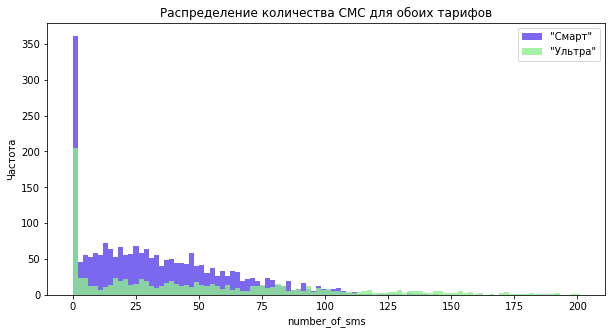

In [48]:
distribution('number_of_sms')

Этот вид связи почти не используется.

Однако абоненты тарифа **<font color=“blue”>«Смарт»</font>** проявляют бóлбшую активность, в среднем обмениваются 33 сообщениями в месяц, укладываясь при этом в тариффный лимит. В отличие от абонентов тарифа **<font color=“green”>«Ультра»</font>**, находятся люди, которые переплачивают за СМС, но таких очень мало.

#### Интернет-трафик

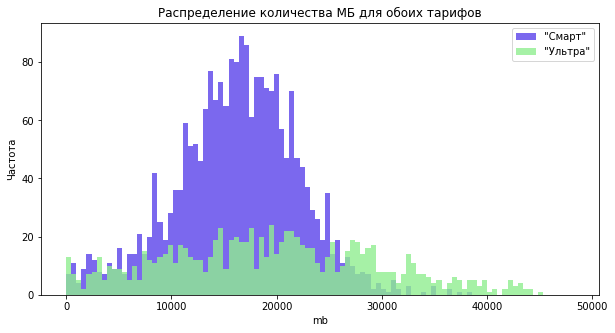

In [49]:
distribution('mb')

**Тариф <font color=“blue”>«Смарт»</font>**

Абоненты этого тарифа активно пользуются интернетом, значительная часть, почти половина, превышает лимит в 15360 МБ и переплачивая (практически симметричное распределение, медианное значение = 16531 МБ, среднее = 16229)

**Тариф <font color=“green”>«Ультра»</font>**

Пользователи намного реже переплачивают за интернет, при этом используют бóльший трафик, в среднем почти 20 ГБ.

### Проверка гипотез

#### Гипотеза №1: средняя выручка пользователей тарифов **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font>** различаются

Сформулируем основную и альтернативную гипотезы:
- H₀ - средние выручки пользователей тарифов **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font> равны.**
- H₁ - средние выручки пользователей тарифов **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font> не равны.**

Создадим 2 выборки по тарифам:

In [50]:
tariffs_info

,tariff,month_number,minutes,number_of_sms,mb,income_rub,overpayment_rub
0,smart,1,203.852941,18.235294,8513.717647,721.323529,171.323529
1,smart,2,298.689655,24.086207,11597.054310,827.603448,277.603448
2,smart,3,390.051948,31.857143,15104.159091,1164.623377,614.623377
3,smart,4,367.133929,30.741071,13462.180625,963.089286,413.089286
4,smart,5,387.361702,33.77305,15805.184326,1197.510638,647.510638
5,smart,6,395.640244,33.402439,15794.647988,1204.018293,654.018293
6,smart,7,408.353234,33.751244,15743.150348,1223.950249,673.950249
7,smart,8,421.468085,33.638298,16610.720085,1320.595745,770.595745
8,smart,9,428.611538,33.638462,16303.578808,1249.946154,699.946154
9,smart,10,426.136054,33.765306,16757.122891,1364.853741,814.853741


In [51]:
smart_sample = abonents_info.query('tariff == "smart"')['income_rub'].tolist()
ultra_sample = abonents_info.query('tariff == "ultra"')['income_rub'].tolist()

Прежде, чем приступать к проверке равенства средних выручек по тарифам, проверим, равны ли примерно дисперсии полученных выборок:

In [52]:
print('Дисперсия выборки по тарифу "Смарт" =', np.var(smart_sample), 
      '\nДисперсия выборки по тарифу "Ультра" =', np.var(ultra_sample))

if np.var(smart_sample) > np.var(ultra_sample):
    print('Дисперсия выборки по тарифу "Смарт" больше дисперсии по выборке "Ультра" в {}'. format(round(np.var(smart_sample) / np.var(ultra_sample), 2)) + ' разa')
else:
    print('Дисперсия выборки по тарифу "Ультра" больше дисперсии по выборке "Смарт" в {}'. format(round(np.var(ultra_sample) / np.var(smart_sample), 2)) + 'разa')
    


Дисперсия выборки по тарифу "Смарт" = 669485.2209234245 
Дисперсия выборки по тарифу "Ультра" = 141373.07325620344
Дисперсия выборки по тарифу "Смарт" больше дисперсии по выборке "Ультра" в 4.74 разa


Проведем t-test, в `equal_var` передадим False, так как дисперсии выборок значительно различаются: 

In [53]:
alpha = 0.01

results = st.ttest_ind(smart_sample, ultra_sample, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Мы убедились, что средние выручки пользователей тарифов **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font>** различаются.

#### Гипотеза №2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем основную и альтернативную гипотезы:
- H₀ - средняя выручка пользователей из Москвы **равна** выручке пользователей из других регионов.
- H₁ - средняя выручка пользователей из Москвы **не равна** выручке пользователей из других регионов.

Создадим 2 выборки по тарифам:

In [54]:
moscow_sample = abonents_info.query('city == "Москва"')['income_rub'].tolist()
not_moscow_sample = abonents_info.query('city != "Москва"')['income_rub'].tolist()

Прежде, чем приступать к проверке равенства средних выручек по Москве и другим городам, проверим, равны ли примерно дисперсии полученных выборок:

In [55]:
print('Дисперсия выборки по Москве =', np.var(moscow_sample), 
      '\nДисперсия выборки по другим городам =', np.var(not_moscow_sample))

if np.var(smart_sample) > np.var(ultra_sample):
    print('Дисперсия выборки по Москве больше дисперсии по выборке других городов в {}'. format(round(np.var(moscow_sample) / np.var(not_moscow_sample), 2)) + ' разa')
else:
    print('Дисперсия выборки по другим городам больше дисперсии выборки по Москве в {}'. format(round(np.var(not_moscow_sample) / np.var(moscow_sample), 2)) + 'разa')
    

Дисперсия выборки по Москве = 564710.7117467273 
Дисперсия выборки по другим городам = 653886.3270894174
Дисперсия выборки по Москве больше дисперсии по выборке других городов в 0.86 разa


Проведем t-test, в `equal_var` передадим False, так как дисперсии выборок различаются: 

In [56]:
alpha = 0.01

results = st.ttest_ind(moscow_sample, not_moscow_sample, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


H₀ подтвердилась, а следовательно, мы не можем подтвердить гипотезу №2, утверждающую, что выручки по Москве и остальным городам различаются.

### Вывод

**На этапе исследовательского анализа данных мы:**

1. Добавили таблицу `tariffs_info` с средними показателями потребления услуг по месяцам и месячной выручкой по двум тарифам;
2. В таблице `stat_frame` отразили медиану, среднее количество, дисперсию, стандартное отклонение и выручки для обоих тарифов.


**Также мы выяснили:**
1. Выборка абонентов оператора «Мегалайн» неравнозначна: преобладают абоненты с тарифом **<font color=“blue”>«Смарт»</font>** (почти 70%);
2. В среднем пользователи тарифа **<font color=“blue”>«Смарт»</font>** тратят около 380 минут, общаясь по телефону. Абоненты тарифа **<font color=“green”>«Ультра»</font>** реже общаются по телефону, но те, кто общаются - тратят больше минут, в среднем 500.
3. Пользователели тарифа **<font color=“blue”>«Смарт»</font>** отправляют в месяц около 30 СМС, а абоненты тарифа **<font color=“green”>«Ультра»</font>** - примерно 45. Тем не менее, пользователи **<font color=“blue”>«Смарта»</font>** гораздо чаще используют данный вид связи. 
4. Абоненты тарифа **<font color=“blue”>«Смарт»</font>** потребляют около 15 ГБ интернет-трафика, пользователи **<font color=“green”>«Ультры»</font>** намного реже переплачивают за интернет, при этом используют бóльший трафик, в среднем 18-20 ГБ.
5. Прибыль с одного пользователя тарифа **<font color=“blue”>«Смарт»</font>** в среднем в месяц составляет 1300 руб., а абонента тарифа **<font color=“green”>«Ультра»</font>** - 2070 рублей.
6. Пользователи обоих тарифов, в среднем, практически всегда укладываются в лимиты своих тарифов, не превышая абонентский пакет. Однако, в обеих выборках пользователи чаще переплачивают, особенно абоненты Смарта (в среднем до 1000 руб сверх абонентской платы). Основной причиной переплат является потребление дополнительных ГБ сверх тарифного плана.

**Гипотезы**
- Гипотеза №1 подтвердилась, средние выручки пользователей тарифов **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font>** различаются. 
- Гипотеза №2 опроверглась, средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

## Вывод

Мы проаналиировали 2 тарифа оператора "Мегалайн" основываясь на данных о 500 абонентах и условий тарифов, собранных за 18 год. 


Данные нам достались в хорошем состоянии, поэтому этап предобработки в большей степени был посвящен не исправлению ошибок и заполнению пропусков, а дополнительным рассчетам, для дальнейшего анализа. Дальнейшее исследования основывалось на месячных показателях, поэтому важным результатом предобработки стала новая таблица - `abonents_info`, в которой хранится помесячная информация о пользователях тарифов, для которой мы в том числе рассчитали помесячную среднюю выручку с абонента и средние размеры переплат.


Основные инсайты:

- 70% пользователей из общей выборки - абоненты тарифа **<font color=“blue”>«Смарт»</font>**;
- Самым популярным видом связи являются звонки, далее идет интернет и реже всего пользователи общаются по СМС.
- 75% пользователей тарифа **<font color=“blue”>«Смарт»</font>** из нашей выборки не укладываются в тарифный план и переплачивают за привышенные лимиты, в то время как противоположная ситуация обстоит с тарифом **<font color=“green”>«Ультра»</font>**: 86% абонентов этого тарифа укладываются в абонентскую плату.
- Основной причиной переплат является превышенный интернет-трафик.
- Cуммы переплат у тарифа **<font color=“blue”>«Смарт»</font>**, как правило, выше.
- Абоненты тарифа **<font color=“blue”>«Смарт»</font>** активнее пользуются тремя видами связи, чем абоненты тарифа **<font color=“green”>«Ультра»</font>**, однако последние расходуют больше минут, СМС и МБ.

Мы проверили 2 гипотезы:

- Гипотеза №1 подтвердилась, средние выручки пользователей тарифов **<font color=“blue”>«Смарт»</font>** и **<font color=“green”>«Ультра»</font>** различаются. 
- Гипотеза №2 не подтвердилась, у нас нет оснований утверждать, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Изначально мы видим, что ежемесячная плата за тариф **<font color=“blue”>«Смарт»</font>** меньше платы за тариф **<font color=“green”>«Ультра»</font>** на 1400 руб.

В ходе исследования мы выяснили, что пользователи тарифа **<font color=“blue”>«Смарт»</font>** гораздо чаще превышают лимит своего тарифа (чаще всего им не хватает интренет-трафика) и переплачивают (размер средней переплаты сверх фиксированной цены - 740 руб., медианное значение - 473 руб.). Абоненты тарифа **<font color=“green”>«Ультра»</font>** намного реже выходят за рамки фиксированной стоимости, размер самих переплат также меньше - в среднем 120 руб. в месяц. Однако средняя месячная прибыль с одного пользователя тарифа **<font color=“green”>«Ультра»</font>** больше примерно на 780 руб., чем средняя прибыль с пользователя **<font color=“blue”>«Смарта»</font>**, так как даже с учетом переплат, пользователи **<font color=“blue”>«Смарта»</font>** платят в месяц меньше, чем пользователи **<font color=“green”>«Ультры»</font>**, которые не выходили за рамки тарифного плана. 
Таким образом, опираясь на данные, предоставленные по двум тарифам, можно сделать вывод, что тариф **<font color=“green”>«Ультра»</font>** выгоднее для оператора связи, и коммерческому отделу стоит сделать бóльший акцент на его продвижении.